Loading the dataset

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\harik\Documents\PAPERPRESENTATION\SHAP AND LIME\DATASET\recruitment_data.csv")


Exploratory Data Analysis (EDA):

In [3]:
data.describe()
data.info()
data.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021031,-0.025579,-0.008068,0.037727,0.018064,0.001850
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.003822,-0.020887,0.012333,0.023729,-0.023753,-0.002249
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.020600,0.012807,-0.043367,0.031115,-0.036923,0.236710
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.007920,-0.051701,0.006323,0.013891,0.029603,0.122494
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009187,-0.008387,0.040883,-0.024572,-0.000466,0.044025
DistanceFromCompany,-0.021031,0.003822,0.020600,0.007920,0.009187,1.000000,-0.019594,-0.016891,0.004627,-0.007315,-0.016791
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019594,1.000000,-0.004887,-0.027967,0.012004,0.146064
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016891,-0.004887,1.000000,-0.004266,-0.031189,0.203668
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004627,-0.027967,-0.004266,1.000000,0.004712,0.169177
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007315,0.012004,-0.031189,0.004712,1.000000,-0.477552


# Correlation matrix

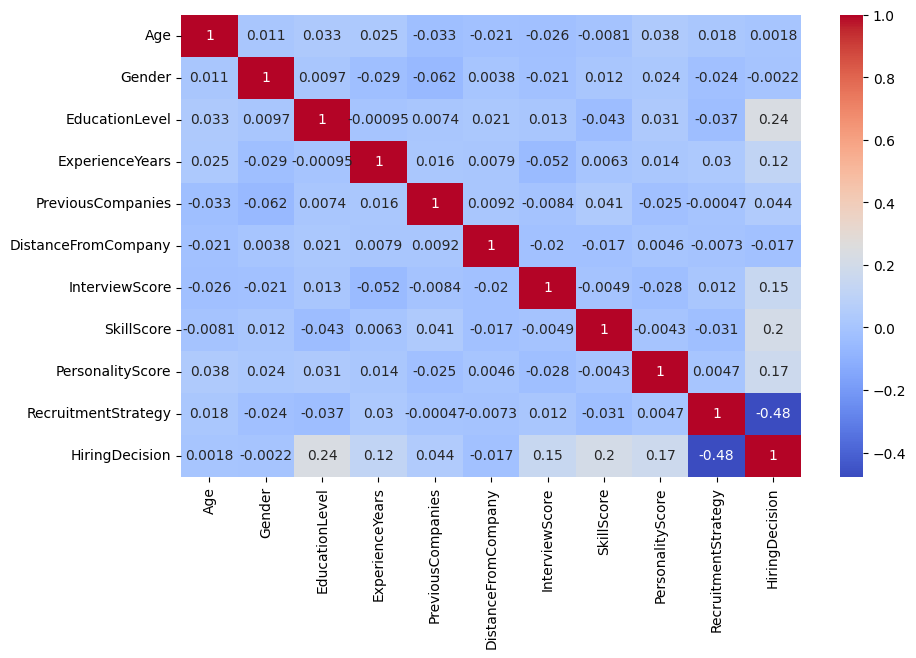

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Handle Missing Values:

In [4]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()


Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

Class distribution of target variable

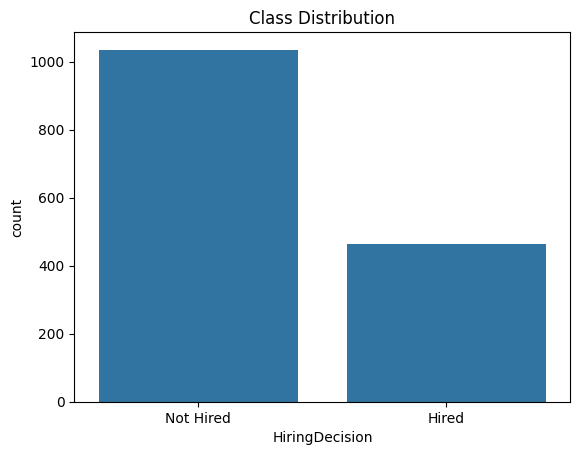

In [19]:

sns.countplot(x='HiringDecision', data=data)
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Not Hired', 'Hired'])
plt.show()

Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)
X = data.drop(columns=['HiringDecision'])
y = data['HiringDecision']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Multiple Models & Select the Best One

RandomForest Accuracy: 0.9333
SVM Accuracy: 0.9167
LogisticRegression Accuracy: 0.8667
CatBoost Accuracy: 0.9533
XGBoost Accuracy: 0.9433
GradientBoosting Accuracy: 0.9267
AdaBoost Accuracy: 0.9233
KNN Accuracy: 0.8767


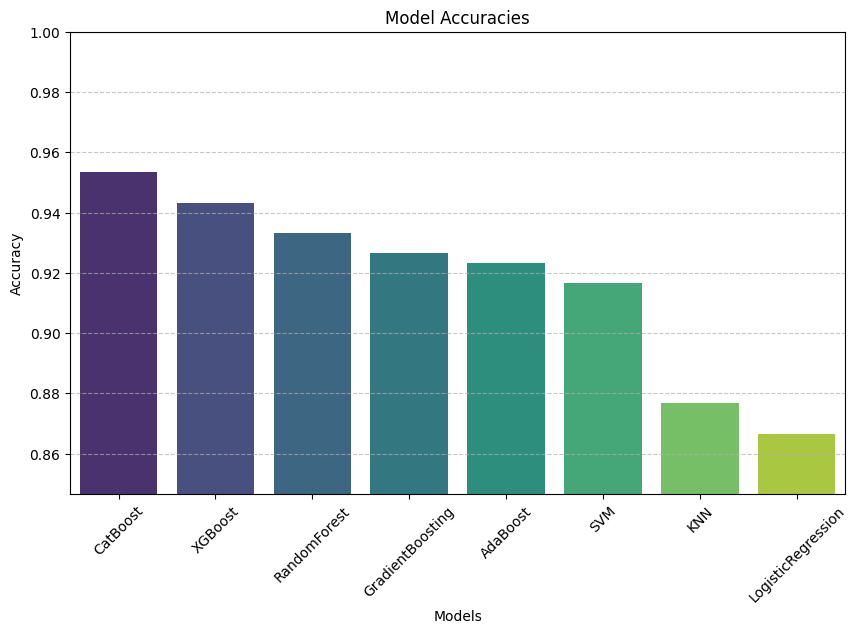

Best Model: <catboost.core.CatBoostClassifier object at 0x0000024485D54380> with Accuracy: 0.9533


In [26]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Add additional models
models.update({
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
})

# Train models and store accuracies
best_model = None
best_accuracy = 0
accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Convert accuracies to list for sorting
sorted_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract model names and accuracy values
model_names, accuracy_values = zip(*sorted_models)

# Create DataFrame for Seaborn
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})

# Plot model accuracies with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette="viridis", legend=False)

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(min(accuracy_values) - 0.02, 1)  # Set a reasonable y-limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(f"Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")


Hyperparameter Tuning (Boost Accuracy)

In [27]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for CatBoost (Best Performing Model)
catboost_params = {
    'iterations': [200, 500],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5, 7]
}

catboost = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(catboost, catboost_params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Optimized Accuracy: {final_accuracy:.4f}")


Final Optimized Accuracy: 0.9533


In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter grids for CatBoost
catboost_param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 300, 500, 700],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Initialize CatBoostClassifier
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Perform GridSearchCV for CatBoost
catboost_grid_search = GridSearchCV(
    catboost, catboost_param_grid, 
    cv=10, scoring='accuracy', n_jobs=-1
)
catboost_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy for CatBoost
print(f"Best CatBoost Params: {catboost_grid_search.best_params_}")
print(f"Best CatBoost Accuracy: {catboost_grid_search.best_score_:.4f}")

# Define hyperparameter grids for XGBoost
xgboost_param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBClassifier
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform GridSearchCV for XGBoost
xgboost_grid_search = GridSearchCV(
    xgboost, xgboost_param_grid, 
    cv=10, scoring='accuracy', n_jobs=-1
)
xgboost_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy for XGBoost
print(f"Best XGBoost Params: {xgboost_grid_search.best_params_}")
print(f"Best XGBoost Accuracy: {xgboost_grid_search.best_score_:.4f}")

# Perform RandomizedSearchCV for CatBoost as an alternative
catboost_random_search = RandomizedSearchCV(
    catboost, catboost_param_grid, 
    n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=42
)
catboost_random_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy for CatBoost using RandomizedSearchCV
print(f"Best CatBoost Params (Randomized): {catboost_random_search.best_params_}")
print(f"Best CatBoost Accuracy (Randomized): {catboost_random_search.best_score_:.4f}")

# Perform RandomizedSearchCV for XGBoost as an alternative
xgboost_random_search = RandomizedSearchCV(
    xgboost, xgboost_param_grid, 
    n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=42
)
xgboost_random_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy for XGBoost using RandomizedSearchCV
print(f"Best XGBoost Params (Randomized): {xgboost_random_search.best_params_}")
print(f"Best XGBoost Accuracy (Randomized): {xgboost_random_search.best_score_:.4f}")


Best CatBoost Params: {'depth': 8, 'iterations': 700, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best CatBoost Accuracy: 0.9583


c:\Users\harik\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:30:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 700, 'subsample': 0.8}
Best XGBoost Accuracy: 0.9392
Best CatBoost Params (Randomized): {'learning_rate': 0.2, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 8}
Best CatBoost Accuracy (Randomized): 0.9558


c:\Users\harik\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params (Randomized): {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best XGBoost Accuracy (Randomized): 0.9317


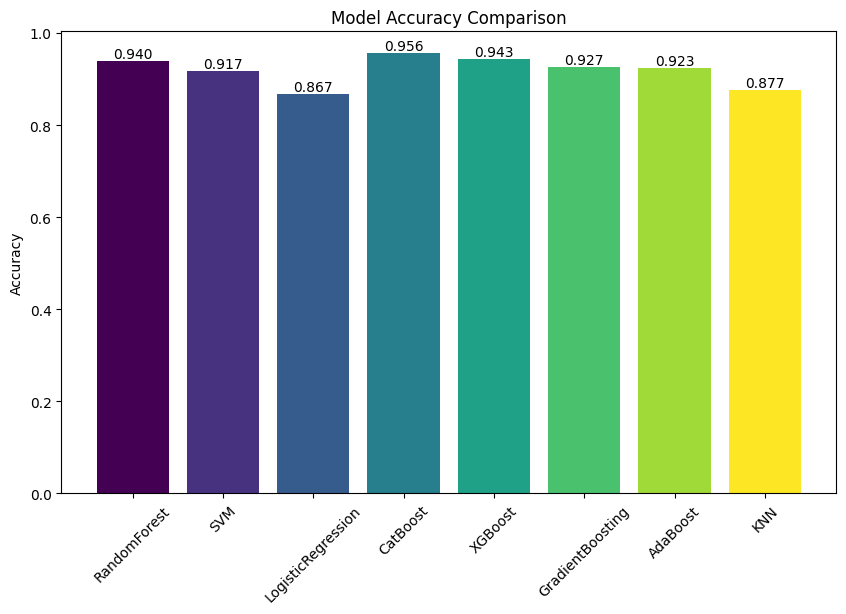

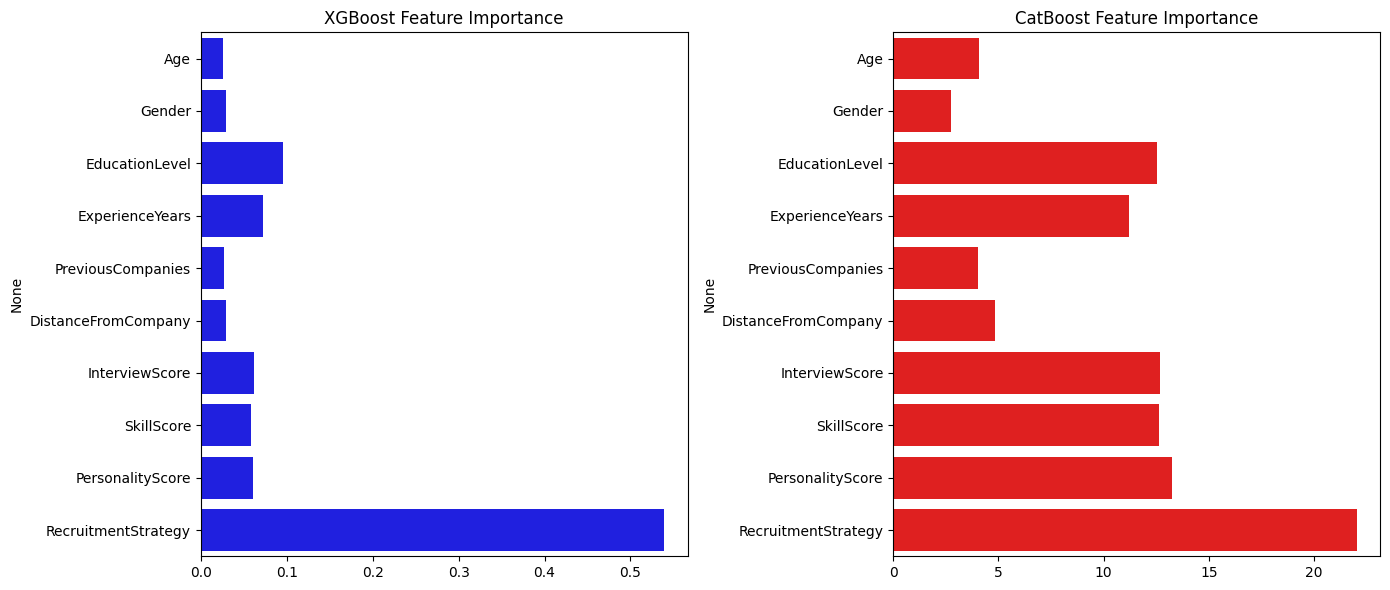

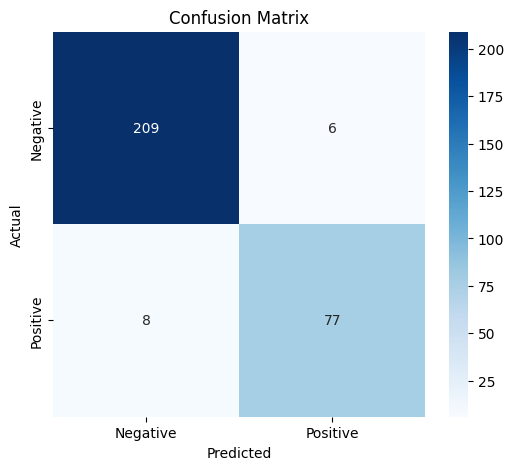

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.91      0.92        85

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Model Accuracies
model_accuracies = {
    "RandomForest": 0.9400,
    "SVM": 0.9167,
    "LogisticRegression": 0.8667,
    "CatBoost": 0.9558,
    "XGBoost": 0.9433,
    "GradientBoosting": 0.9267,
    "AdaBoost": 0.9233,
    "KNN": 0.8767
}

# Accuracy Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(model_accuracies)))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=colors)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():.3f}", ha='center', va='bottom')

plt.show()

# Model Training
best_xgb = XGBClassifier(colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=700, subsample=0.8)
best_xgb.fit(X_train_scaled, y_train)

best_catboost = CatBoostClassifier(learning_rate=0.2, l2_leaf_reg=3, iterations=500, depth=8, verbose=0)
best_catboost.fit(X_train_scaled, y_train)

# Feature Importance
feature_importance_xgb = best_xgb.feature_importances_
feature_importance_cb = best_catboost.get_feature_importance()

features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(len(feature_importance_xgb))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=feature_importance_xgb, y=features, ax=axes[0], color="blue")
axes[0].set_title("XGBoost Feature Importance")

sns.barplot(x=feature_importance_cb, y=features, ax=axes[1], color="red")
axes[1].set_title("CatBoost Feature Importance")

plt.tight_layout()
plt.show()

# Confusion Matrix
best_model = best_catboost
y_pred_best = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best))


In [32]:
import joblib
joblib.dump(best_catboost, "catboost_model.pkl")


['catboost_model.pkl']

In [33]:
import joblib

# Save the best model (assuming `best_model` holds your final trained model)
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [34]:
# Load the saved model for future predictions
loaded_model = joblib.load('best_model.pkl')


In [37]:
# Define new input data (X_new) with the same structure as X
X_new = pd.DataFrame({
	'Age': [29, 35],
	'Gender': [1, 0],
	'EducationLevel': [3, 2],
	'ExperienceYears': [5, 10],
	'PreviousCompanies': [2, 3],
	'DistanceFromCompany': [15.5, 20.3],
	'InterviewScore': [80, 70],
	'SkillScore': [85, 75],
	'PersonalityScore': [90, 88],
	'RecruitmentStrategy': [1, 2]
})

# Make predictions on new data
# Ensure the input data is scaled using the same scaler used during training
X_new_scaled = scaler.transform(X_new)

# Make predictions on the scaled data
y_pred_new = loaded_model.predict(X_new_scaled)

# Display the predictions
print("Predictions for new data:", y_pred_new)


Predictions for new data: [1 0]


In [39]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the saved model
model = joblib.load('best_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input data
        data = request.get_json()

        # Convert the data into a numpy array for prediction
        input_data = np.array(data['input']).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)

        # Return the prediction as a JSON response
        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [45]:
# Ensure the IPython package is installed
%pip install IPython

# Import display and HTML from IPython
from IPython.display import display, HTML


Note: you may need to restart the kernel to use updated packages.


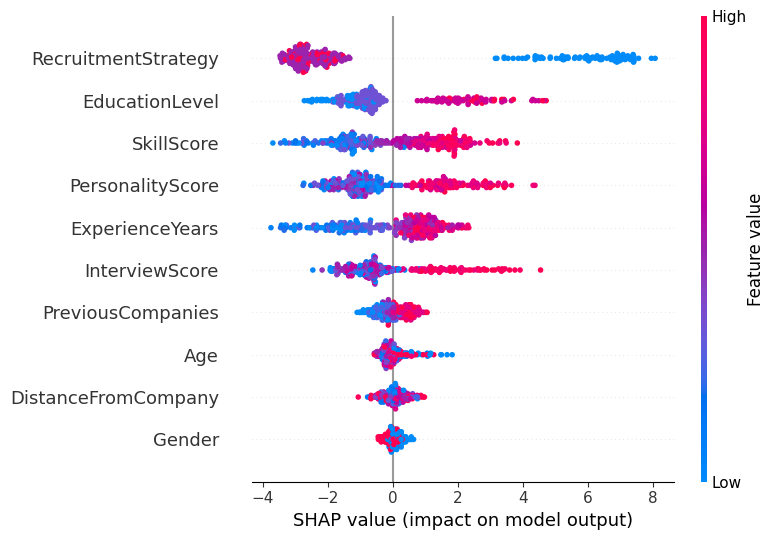

ImportError: cannot import name 'display' from 'IPython.core.display' (C:\Users\harik\AppData\Roaming\Python\Python312\site-packages\IPython\core\display.py)

In [ ]:
import shap
import lime
import lime.lime_tabular

# SHAP Explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test)

# LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Rejected', 'Hired'], mode='classification')
exp = explainer.explain_instance(X_test_scaled[0], best_model.predict_proba)
exp.show_in_notebook()